# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:***  Algorithm, that gives you an output depending on the input

***Variable:*** One or more letters that store information

***Calling a function:*** Execute the algorithm, that was defined earlier

***String:*** One or more characters; it's a datatype in Python

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
import numpy as np
style.use('fivethirtyeight')

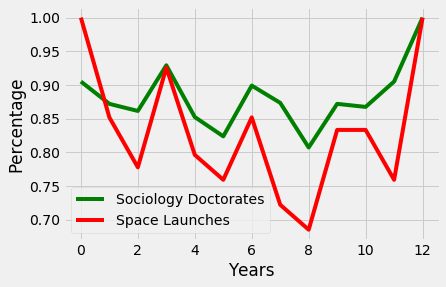

In [18]:
sociology_doctorates = np.array([601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664])
space_launches = np.array([54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54])
years = list(range(1997, 2009 + 1))

pct_sociology_doctorates = [i/sociology_doctorates[-1] for i in sociology_doctorates]
pct_space_launches = [i/space_launches[-1] for i in space_launches]

plt.plot(pct_sociology_doctorates, c='g', label = 'Sociology Doctorates')
plt.plot(pct_space_launches, c='r', label = 'Space Launches')
plt.legend()
plt.xlabel ('Years')
plt.ylabel ('Percentage')
plt.show()

0.6227570902902629


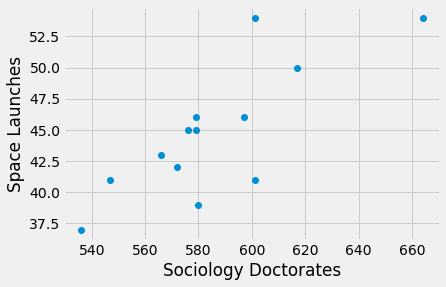

In [25]:



plt.plot(sociology_doctorates, space_launches, 'o')
plt.xlabel ('Sociology Doctorates')
plt.ylabel ('Space Launches')
plt.show()

In [27]:
sociology_2 = sociology_doctorates.reshape(13,1)
space_2 = space_launches.reshape(13,1)
linreg = LinearRegression()
linreg.fit(sociology_2, space_2)
r_squared = linreg.score(sociology_2, space_2)

print(r_squared)


0.6227570902902629


In [ ]:
###The Space Launches increase with increasing number of Sociology Doctorates, so the model would suppose a correlation, although, it's not necessarily a good correlation (r² is only 0.62).
##That doesn't mean that there is necessarily a causal relation. 

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

[0.15000015000015, 0.12766737262387493, 0.10630321443547579, 0.08671523592773475, 0.06944263439292911, 0.05472771186961875, 0.04255536202550837, 0.03272907908776297, 0.024951833900010614, 0.018892025709124658, 0.014227776181046217, 0.010671367453158307, 0.00797910605216581, 0.005952097672320925, 0.004432213940195856, 0.003296086085264039, 0.0024487737947217637, 0.0018179422654175, 0.0013488832971656518, 0.001000443192667196, 0.0007417876887781211, 0.0005498822326300742, 0.0004075563926850804, 0.0003020315480572394, 0.00022380887395988323, 0.00016583375691083677, 0.00012287027236608747, 9.10342000428758e-05, 6.744509851508711e-05, 4.996746940067023e-05, 3.701840981427933e-05, 2.7424789580438057e-05, 2.0317265203196272e-05, 1.5051664456793717e-05, 1.1150692281559121e-05, 8.260715595090635e-06, 6.119732303708726e-06, 4.533633165925705e-06, 3.358611210145198e-06, 2.488127600295082e-06, 1.8432542239186388e-06, 1.365518488958455e-06, 1.0116021707094066e-06, 7.494139751020128e-07, 5.551798870

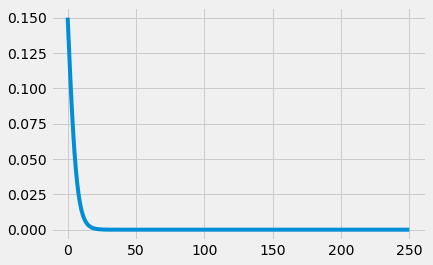

In [44]:
P = 1000000
k = 3/(P*10)
t = [i for i in range(251)]
i0 = 1

def new_infections(P, k, t, i0):
    results = []
    for i in t:
        #upper_value = ((math.exp(-k*P*i)*k*P**2)*(-1+(P/i0)))
        #lower_value = ((1+math.exp(-k*P*i))*(-1+(P/i0))**2)
        results.append(((math.exp(-k*P*i)*k*P**2)*(-1+(P/i0)))/((1+math.exp(-k*P*i))*(-1+(P/i0))**2))
        #results.append(upper_value/lower_value)
    return results
   


    
new_infections = new_infections(P,k,t,i0)
print(new_infections)
plt.plot(new_infections)
plt.show()


        

In [40]:
n =[1,2,3]
print (n)
n.append(5)
print(n)
def calc_total_infections(new_infections):
    total_infections = []
    summe = 0
    for i in new_infections:
        summe += i
        total_infections.append(summe)
        
    return total_infections
        
print(calc_total_infections(n))


[1, 2, 3]
[1, 2, 3, 5]
[1, 3, 6, 11]


##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [65]:
def fibonacci (n):
    fibonacci = [0, 1]
    
    for i in range(1, n):
        fibonacci.append(fibonacci[i]+fibonacci[i-1])
    
    return fibonacci

print(fibonacci(100))


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

354224848179261915075
